# 6.5 Unsupervised Machine Learning: Clustering
## This script contains the following:
### 01. Importing Libraries and Data
### 02. Elbow Technique
### 03. k-means Clustering

### 01. Importing Libraries and Data 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
# Creating path variable
path = r'C:\Users\widne\Documents\CareerFoundry Exercises\Data_Immersion\Achievement 6\06-2024 International Football Matches'

In [4]:
# Importing team results pickle
df_team_results = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'team_results.pkl'))

In [5]:
# Checking dataframe
df_team_results.shape

(338, 85)

In [6]:
df_team_results.head()

,team,home_wins,away_wins,total_wins,home_losses,away_losses,total_losses,home_draws,away_draws,total_draws,...,friendly_goals_against,average_friendly_goals_against,friendly_goal_difference,friendly_average_goal_difference,tournament_goals_for,average_tournament_goals_for,tournament_goals_against,average_tournament_goals_against,tournament_goal_difference,average_tournament_goal_difference
0,Abkhazia,11.0,3.0,14.0,3.0,2.0,5.0,8.0,5.0,13.0,...,6.0,1.000000,-2.0,-0.333333,47.0,1.807692,20.0,0.769231,27.0,1.038462
1,Afghanistan,18.0,17.0,35.0,17.0,52.0,69.0,10.0,21.0,31.0,...,49.0,1.484848,-20.0,-0.606061,109.0,1.068627,228.0,2.235294,-119.0,-1.166667
2,Albania,73.0,27.0,100.0,78.0,115.0,193.0,46.0,34.0,80.0,...,140.0,1.228070,-5.0,-0.043860,216.0,0.833977,425.0,1.640927,-209.0,-0.806950
3,Alderney,1.0,4.0,5.0,46.0,82.0,128.0,1.0,1.0,2.0,...,12.0,4.000000,-9.0,-3.000000,70.0,0.530303,608.0,4.606061,-538.0,-4.075758
4,Algeria,191.0,73.0,264.0,60.0,103.0,163.0,82.0,75.0,157.0,...,239.0,1.057522,58.0,0.256637,581.0,1.622905,354.0,0.988827,227.0,0.634078


### 02. Elbow Technique

In [7]:
# Dropping team names for clustering
df = df_team_results.drop(columns={'team'})
df.head()

,home_wins,away_wins,total_wins,home_losses,away_losses,total_losses,home_draws,away_draws,total_draws,home_games_played,...,friendly_goals_against,average_friendly_goals_against,friendly_goal_difference,friendly_average_goal_difference,tournament_goals_for,average_tournament_goals_for,tournament_goals_against,average_tournament_goals_against,tournament_goal_difference,average_tournament_goal_difference
0,11.0,3.0,14.0,3.0,2.0,5.0,8.0,5.0,13.0,22.0,...,6.0,1.000000,-2.0,-0.333333,47.0,1.807692,20.0,0.769231,27.0,1.038462
1,18.0,17.0,35.0,17.0,52.0,69.0,10.0,21.0,31.0,45.0,...,49.0,1.484848,-20.0,-0.606061,109.0,1.068627,228.0,2.235294,-119.0,-1.166667
2,73.0,27.0,100.0,78.0,115.0,193.0,46.0,34.0,80.0,197.0,...,140.0,1.228070,-5.0,-0.043860,216.0,0.833977,425.0,1.640927,-209.0,-0.806950
3,1.0,4.0,5.0,46.0,82.0,128.0,1.0,1.0,2.0,48.0,...,12.0,4.000000,-9.0,-3.000000,70.0,0.530303,608.0,4.606061,-538.0,-4.075758
4,191.0,73.0,264.0,60.0,103.0,163.0,82.0,75.0,157.0,333.0,...,239.0,1.057522,58.0,0.256637,581.0,1.622905,354.0,0.988827,227.0,0.634078


In [8]:
df.fillna(0, inplace=True)

In [9]:
num_cl = range(1,10) # Defining number of clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defining k-means clusters in range

In [10]:
# Creating score thet represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score

C:\Users\widne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\widne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\widne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\widne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-411557758.9682509,
 -168835421.71929488,
 -113503292.46629487,
 -84769610.69453724,
 -71234095.69734551,
 -59945236.85902015,
 -53378004.20326747,
 -47612914.835493736,
 -43009183.557653144]

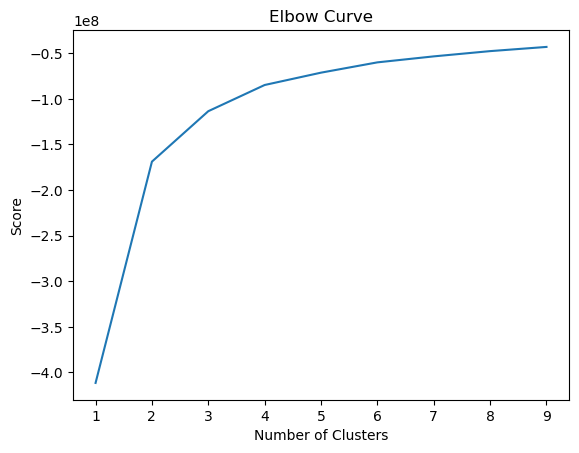

In [11]:
# Plotting elbow curve
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on this graph, there is a considerable jumps between clusters until about 4 for the number of clusters where the curve straightens out. Thus, the optimal amount of clusters for this data is 4

### 03. k-means Clustering

In [12]:
# Creating k-means object
kmeans = KMeans(n_clusters=4)

In [13]:
# Fitting k-means object to data
kmeans.fit(df)

C:\Users\widne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\widne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\widne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\widne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [15]:
df.head()

,home_wins,away_wins,total_wins,home_losses,away_losses,total_losses,home_draws,away_draws,total_draws,home_games_played,...,average_friendly_goals_against,friendly_goal_difference,friendly_average_goal_difference,tournament_goals_for,average_tournament_goals_for,tournament_goals_against,average_tournament_goals_against,tournament_goal_difference,average_tournament_goal_difference,clusters
0,11.0,3.0,14.0,3.0,2.0,5.0,8.0,5.0,13.0,22.0,...,1.000000,-2.0,-0.333333,47.0,1.807692,20.0,0.769231,27.0,1.038462,0
1,18.0,17.0,35.0,17.0,52.0,69.0,10.0,21.0,31.0,45.0,...,1.484848,-20.0,-0.606061,109.0,1.068627,228.0,2.235294,-119.0,-1.166667,0
2,73.0,27.0,100.0,78.0,115.0,193.0,46.0,34.0,80.0,197.0,...,1.228070,-5.0,-0.043860,216.0,0.833977,425.0,1.640927,-209.0,-0.806950,3
3,1.0,4.0,5.0,46.0,82.0,128.0,1.0,1.0,2.0,48.0,...,4.000000,-9.0,-3.000000,70.0,0.530303,608.0,4.606061,-538.0,-4.075758,3
4,191.0,73.0,264.0,60.0,103.0,163.0,82.0,75.0,157.0,333.0,...,1.057522,58.0,0.256637,581.0,1.622905,354.0,0.988827,227.0,0.634078,1


In [16]:
df['clusters'].value_counts()

clusters
0    143
3    109
1     66
2     20
Name: count, dtype: int64

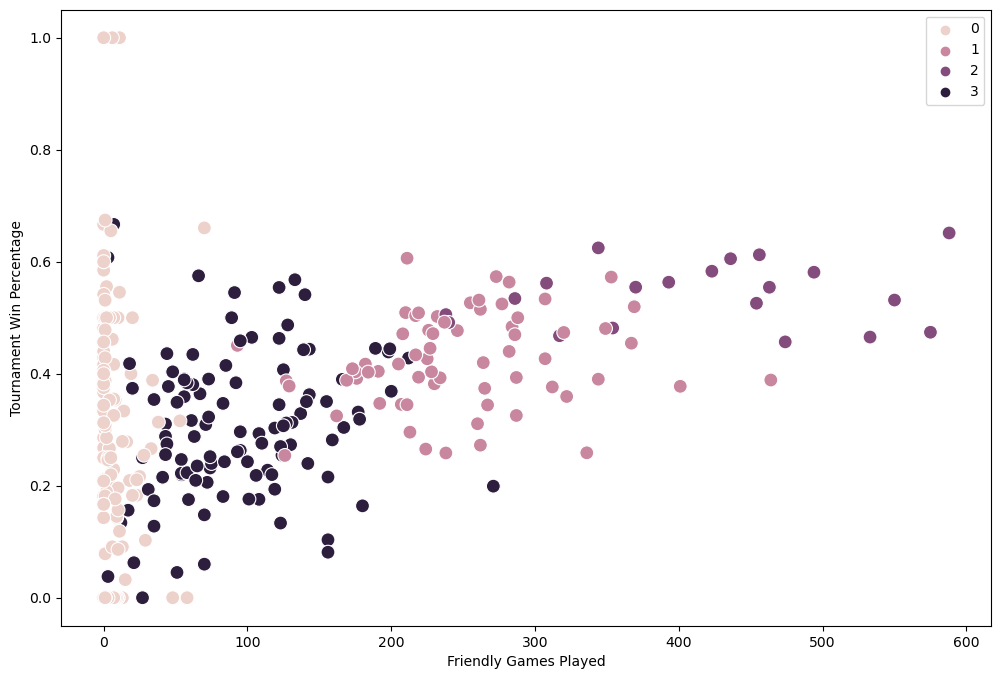

In [17]:
# Plotting clusters for 'total_friendly_games_played' and 'tournament_win_pct' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_friendly_games_played'], y=df['tournament_win_pct'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Friendly Games Played')
plt.ylabel('Tournament Win Percentage')
plt.show()

For this cluster it looks like that the teams with more friendly games played have less variance in the tournament win percentage with hovering around 40 to 60 percent. This is an interesting find where there might be a correllation between playing friendly matches and the tournament win percentage.

<function matplotlib.pyplot.show(close=None, block=None)>

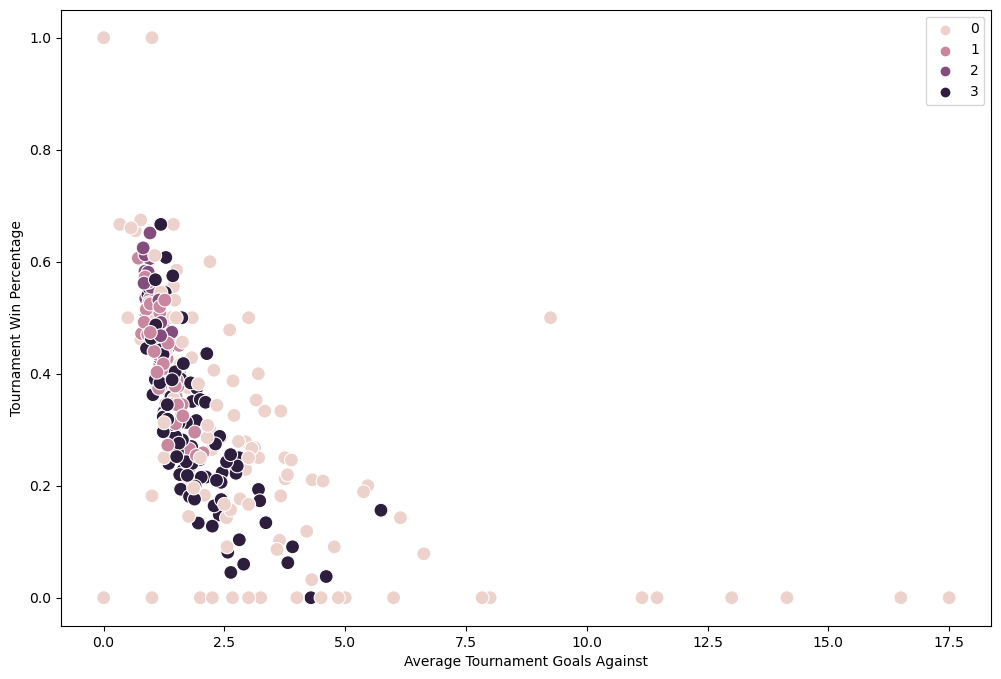

In [18]:
# Plotting clusters for 'average_tournament_goals_against' and 'tournament_win_pct'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['average_tournament_goals_against'], y=df['tournament_win_pct'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Average Tournament Goals Against')
plt.ylabel('Tournament Win Percentage')
plt.show

This cluster looks at the number of goals a team gives up vs the tournament win percentage. The clusters are showing that teams with the higher win percentage typically average less than 2 goals per tournament game.

<function matplotlib.pyplot.show(close=None, block=None)>

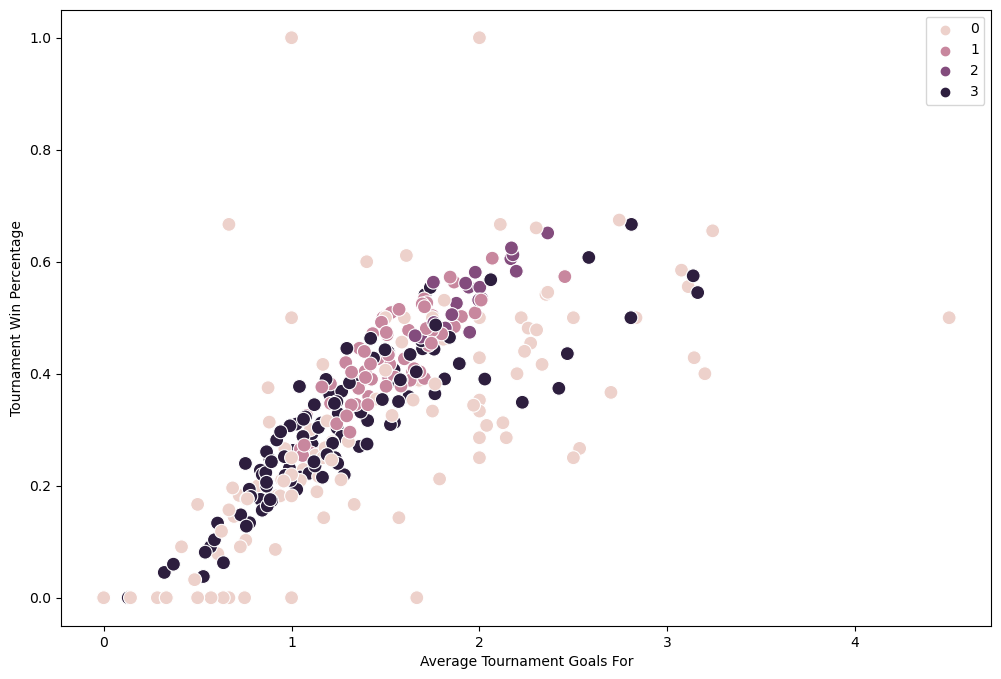

In [19]:
# Plotting clusters for 'average_tournament_goals_for' and 'tournament_win_pct'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['average_tournament_goals_for'], y=df['tournament_win_pct'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Average Tournament Goals For')
plt.ylabel('Tournament Win Percentage')
plt.show

This clustering looks at the average goals each team scores each tournament game vs their tournament win percentage. There does not seem to be clear clustering of groups in this plot, which suggests that there is not much of a classifying relationship between the two variables. 

In [20]:
df.loc[df['clusters']==0, 'cluster'] = 'pink'
df.loc[df['clusters']==1, 'cluster'] = 'light purple'
df.loc[df['clusters']==2, 'cluster'] = 'purple'
df.loc[df['clusters']==3, 'cluster'] = 'dark purple'

In [21]:
df.groupby('cluster').agg({'total_friendly_games_played':['mean','median'],
                           'average_tournament_goals_for':['mean','median'],
                          'average_tournament_goals_against':['mean','median'],
                          'tournament_win_pct':['mean','median']})

total_friendly_games_played        average_tournament_goals_for  \
                                    mean median                         mean   
cluster                                                                        
dark purple                    93.146789   85.0                     1.276677   
light purple                  248.257576  235.5                     1.525951   
pink                            6.783217    2.0                     1.172664   
purple                        414.800000  429.5                     1.951574   

                       average_tournament_goals_against            \
                median                             mean    median   
cluster                                                             
dark purple   1.183486                         1.863403  1.618750   
light purple  1.511797                         1.261190  1.246662   
pink          1.046512                         2.639944  1.900000   
purple        1.945673                         1.045457  1.019470   

             tournament_win_pct            
                           mean    median  
cluster                                    
dark purple            0.303837  0.303030  
light purple           0.423670  0.417260  
pink                   0.248114  0.219512  
purple                 0.541349  0.544385

By looking at the descriptive stats, it seems that the teams with the higher average tounament win percentage typically play more firendly matches, score more goals, and allow fewer goals on average. In the future we can look at the performance in friendly matches to see if better friendly match perfomance leads to better tournament performance.